<h1>University Football Player Injury Predictions<h1>

<h3>This project uses the kaggle dataset linked <a href="https://www.kaggle.com/datasets/yuanchunhong/university-football-injury-prediction-dataset/data">here</a></h3>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [54]:
data = pd.read_csv("kaggle_dataset/data.csv")

In [55]:
data["Position"] = data["Position"].map({"Forward":0, "Midfielder":1, "Defender":2, "Goalkeeper":3})
data["Lifestyle"] = (((data["Stress_Level_Score"]-100)*-1 ) + data["Nutrition_Quality_Score"]) / 2
data["Physicals"] = (data["Knee_Strength_Score"] + data["Hamstring_Flexibility"] + data["Agility_Score"] + data["Balance_Test_Score"]) / 4

In [56]:
shuffled_df = data.sample(frac=1).reset_index(drop=True)

label_data = shuffled_df["Injury_Next_Season"]
train_data = shuffled_df.drop(labels=[
    "Injury_Next_Season", "Height_cm", "Weight_kg", "Stress_Level_Score", "Balance_Test_Score",
    "Nutrition_Quality_Score", "Knee_Strength_Score", "Hamstring_Flexibility", "Agility_Score"
    ], inplace=False, axis=1)
train_data.head()

,Age,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Reaction_Time_ms,Sprint_Speed_10m_s,Sleep_Hours_Per_Night,Warmup_Routine_Adherence,BMI,Lifestyle,Physicals
0,20,2,14.203231,13,1,193.746051,6.034336,6.995777,1,20.403232,56.004017,82.816170
1,20,2,10.981231,20,3,270.404606,6.079399,8.165577,0,21.306818,56.031014,74.111770
2,20,3,13.719237,15,3,282.788620,6.107490,7.921972,0,23.054562,46.534741,82.484559
3,22,2,11.587758,39,3,259.140717,6.187725,8.562716,1,17.921147,59.847114,81.715103
4,21,1,5.973523,24,2,279.652564,5.898857,6.775769,1,22.498174,52.110434,72.983130


In [57]:
x_train = train_data[:640]
x_test = train_data[640:]
y_train = label_data[:640]
y_test = label_data[640:]

In [58]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, solver="lbfgs")
)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [59]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        80
           1       0.96      0.94      0.95        80

    accuracy                           0.95       160
   macro avg       0.95      0.95      0.95       160
weighted avg       0.95      0.95      0.95       160



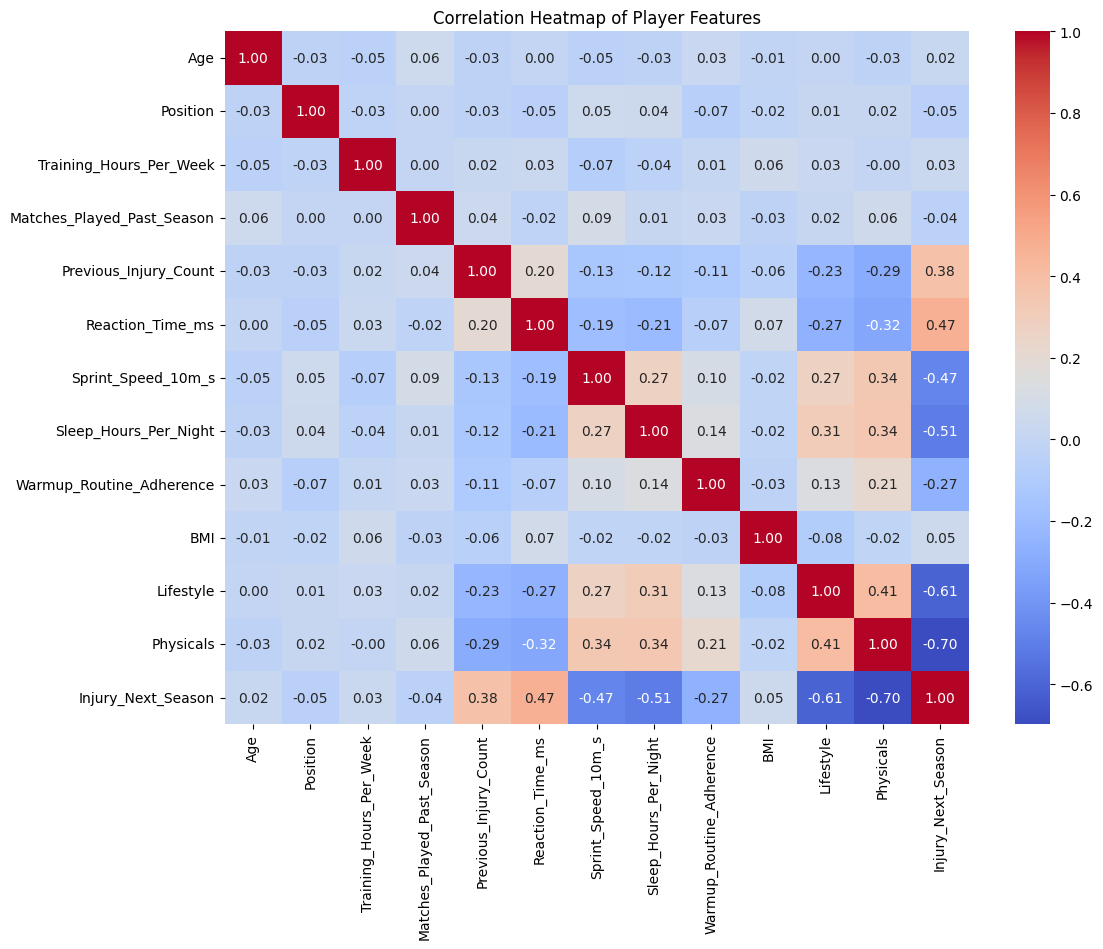

In [60]:
corr_features = [
    "Age", "Position", "Training_Hours_Per_Week", "Matches_Played_Past_Season",
    "Previous_Injury_Count", "Reaction_Time_ms", "Sprint_Speed_10m_s",
    "Sleep_Hours_Per_Night", "Warmup_Routine_Adherence", "BMI",
    "Lifestyle", "Physicals", "Injury_Next_Season"
]

corr_matrix = data[corr_features].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Player Features")
plt.show()

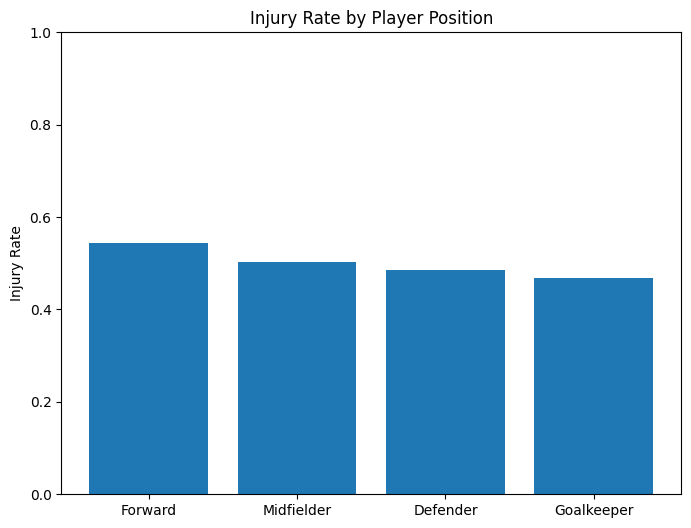

In [61]:
position_names = {0: "Forward", 1: "Midfielder", 2: "Defender", 3: "Goalkeeper"}

injury_rate = data.groupby("Position")["Injury_Next_Season"].mean()

injury_rate.index = injury_rate.index.map(position_names)

plt.figure(figsize=(8, 6))
plt.bar(injury_rate.index, injury_rate.values)
plt.ylabel("Injury Rate")
plt.title("Injury Rate by Player Position")
plt.ylim(0, 1)
plt.show()